In [115]:
# package for querying SAR Imagery
import asf_search as asf


import json
import requests
from PIL import Image
from io import BytesIO
from ipyleaflet import Map, Polygon
from ipywidgets import HTML, Button, VBox, Output
from IPython.display import display, clear_output
from shapely.geometry import Polygon as ShapelyPolygon

In [158]:
# Initialize the map
m = Map(center=(20, 0), zoom=2)

# Initialize an empty list for points and the polygon layer
points = []
polygon = Polygon(locations=[], color="green", fill_color="green")
m.add_layer(polygon)

# Function to handle map clicks
def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        # Get coordinates from the click event
        coords = kwargs.get('coordinates')
        # Append the new point
        points.append(coords)
        
        # Assign a new list to the polygon's locations (this might force the update)
        polygon.locations = list(points)

# Set up the map to listen for clicks
m.on_interaction(handle_click)

# Create a button for generating the WKT representation of the polygon
create_button = Button(description="Create Polygon")

# Function to generate and print the WKT
def create_polygon(b):
    if len(points) > 2:  # Ensure there are at least 3 points
        shapely_polygon = ShapelyPolygon(points)
        print(shapely_polygon.wkt)  # Print the polygon's WKT
    else:
        print("Add more points to create a polygon.")

# Set the button to run `create_polygon` function on click
create_button.on_click(create_polygon)

# Display the map and button
display(m)
display(create_button)

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

Button(description='Create Polygon', style=ButtonStyle())

POLYGON ((-61.77312286453146 -90.35156250000001, -62.43107423292092 43.59375000000001, -76.43460358351301 43.94531250000001, -80.47406532116933 -87.89062500000001, -61.77312286453146 -90.35156250000001))


In [159]:
aoi = ShapelyPolygon(points).wkt

opts = {
    'platform': asf.PLATFORM.SENTINEL1,
    'start': '2018-01-01T00:00:00Z',
    'end': '2023-02-01T23:59:59Z'
}


results = asf.geo_search(intersectsWith=aoi, **opts)

print(f'{len(results)} results found')

ERROR:root:Connection Error (Timeout): CMR took too long to respond. Set asf constant "CMR_TIMEOUT" to increase. (url='https://cmr.earthdata.nasa.gov/search/granules.umm_json', timeout=30)
ERROR:root:The asf-search module ecountered an error with CMR, and the following message was automatically reported to ASF:

"
Error Message: Connection Error (Timeout): CMR took too long to respond. Set asf constant "CMR_TIMEOUT" to increase. (url='https://cmr.earthdata.nasa.gov/search/granules.umm_json', timeout=30)
User Agent: Python/3.12.0; requests/2.31.0; asf_search/7.0.7     
Search Options: {
	intersectsWith: POLYGON ((-61.7731228645314587 -90.0000000000000000, -62.4310742329209205 43.5937500000000071, -76.4346035835130095 43.9453125000000071, -80.4740653211693342 -87.8906250000000142, -61.7731228645314587 -90.0000000000000000))
	start: 2018-01-01T00:00:00Z
	end: 2023-02-01T23:59:59Z
	collections: ['C1205264459-ASF', 'C1205428742-ASF', 'C1208115009-ASF', 'C1208117434-ASF', 'C1212158318-ASF', 

48000 results found


In [143]:
urls = []
for i in range(len(results)):
    to_json = json.loads(str(results[i]))
    url = to_json['properties']['browse']
    if url: urls.append(url[0])

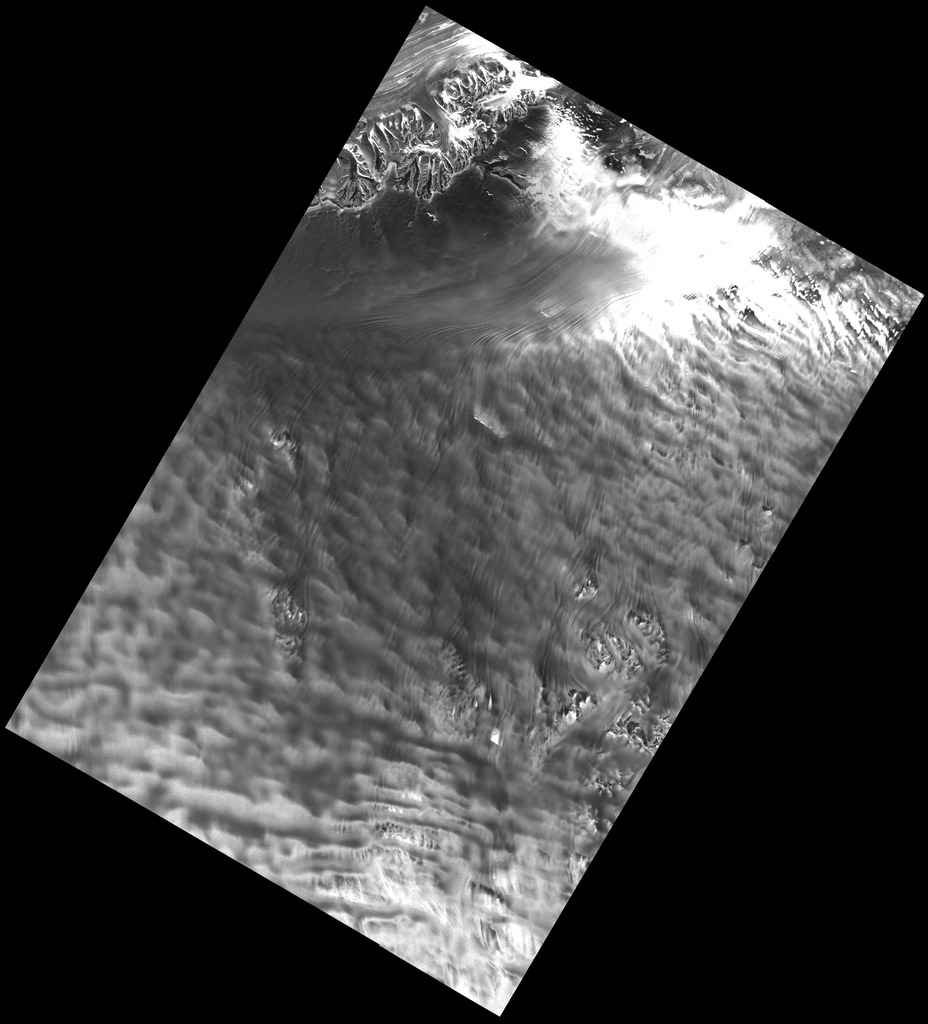

In [152]:
response = requests.get(urls[800])
if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    display(image)
else:
    print("Failed to fetch the image. Status code:", response.status_code)